Desafio do Módulo 1 - Fundamentos de Machine Learning

In [4]:
#Declarando a biblioteca "files" de importação de arquivos do google colab
from google.colab import files
#Fazendo o upload do arquivo dataset para a base de arquivos local
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
#Declarando a biblioteca "pandas" para trabalharmos com DataFrames e a biblioteca numpy para funções de array
import pandas as pd
import numpy as np

#Leitura do arquivo para importado para a variável "bikes"
bikes = pd.read_csv('comp_bikes_mod.csv')

In [26]:
#Verificando o cabeçalho do dataframe
bikes.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [27]:
#Verificando informações do dataframe como: Quantidade de valores não-nulos, Tipos das colunas, quantidade de linhas e colunas
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [28]:
#Conferindo alguns dados estatísticos do dataframe, como: média, mediana, valores mínimos e máximos e os quartis.
bikes.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Pergunta 1

In [0]:
#Cria a variável bikes_1 tendo como base o dataset bikes sem as celulas com valor NaN para a coluna 'dteday'
bikes_1 = bikes.dropna(subset=['dteday'])

In [88]:
bikes_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   instant      14060 non-null  float64
 1   dteday       15641 non-null  object 
 2   season       14061 non-null  float64
 3   yr           14076 non-null  float64
 4   mnth         14062 non-null  float64
 5   hr           14068 non-null  float64
 6   holiday      14076 non-null  float64
 7   weekday      14078 non-null  float64
 8   workingday   14097 non-null  float64
 9   weathersit   14078 non-null  float64
 10  temp         14066 non-null  float64
 11  atemp        14076 non-null  float64
 12  hum          14070 non-null  float64
 13  windspeed    14082 non-null  float64
 14  casual       14071 non-null  float64
 15  registered   14090 non-null  float64
 16  cnt          14079 non-null  float64
 17  dteday_NULL  15641 non-null  bool   
dtypes: bool(1), float64(16), object(1)
memory usag

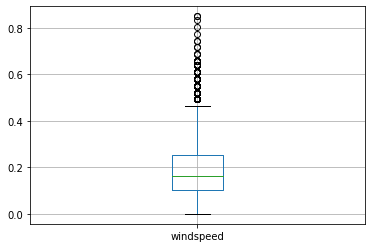

In [15]:
#Gera o gráfico boxplot para encontrar possíveis outliers na columa 'windspeed'
grafico1 = bikes_1.boxplot(column='windspeed')

**Pergunta 4**

In [0]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression
#importa o método train_test_split
from sklearn.model_selection import train_test_split
#importa as métrica para avaliação
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [0]:
#Declaração da variação bikes_4 (pergunta 4) herdando as alterações feitas em bikes_1 e atribuindo às colunas 
#'hum','cnt','casual' os valores médios das respectivas colunas em substituição a ausencia de valor (NaN)
bikes_4 = bikes_1.fillna(bikes_1[['hum','cnt','casual']].mean())


In [21]:
#Checa se as alterações na linha alterior funcionaram
bikes_4.info()

#Percebe-se após o comando .info() que não existe mais variáveis NULL nas colunas 'hum', 'casual' e 'cnt', além da coluna 'dteday'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [0]:

X = bikes_4[['hum','casual']].values
Y = bikes_4['cnt'].values

In [47]:
X.shape

(15641, 2)

In [0]:
Y = Y.reshape(-1,1)

In [49]:
Y.shape

(15641, 1)

In [0]:
# divide os dados entre o conjunto de treino e teste, 80% e 20% respectivamente.
# define qualquer valor para o parâmetro random_state.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

Treinando o modelo com Regressão Linear

In [0]:
#Criação do modelo de Regressão Linear
linear_model = LinearRegression()

In [61]:
#Treina o modelo
linear_model.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#Faz a predição utilizando os dados de teste
predicao_linear_model = linear_model.predict(X)


In [0]:
R2 = r2_score(Y, predicao_linear_model)


In [69]:
print("Coeficiente R2: {} ", format(R2))

Coeficiente R2: {}  0.4059859251122173


**Pergunta 13**

In [0]:
#Importando a árvore de decisão como regressor
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor

In [0]:
#Importação da biblioteca MinMaxScaler para reescrever os dados em uma nova escala
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Declara a váriavel bikes_13 com somente as colunas 'hum','casual' e 'cnt'
#bikes_13 = bikes_4.drop(['instant', 'dteday', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
                       #  'weathersit',	'temp',	'atemp',	'windspeed',	'registered', 'season'], axis=1)

In [0]:
#Reescala as variáveis X e Y utilizando o MinMaxScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [0]:
#Distribui as váriaveis para treino e teste
X__scaled_train, X_scaled_test, y_scaled_train, Y_scaled_test = train_test_split(X_scaled, Y_scaled, test_size=0.20, random_state=5)

In [0]:
Decision_T_R_model = DecisionTreeRegressor()

In [96]:
Decision_T_R_model.fit(X_scaled, Y_scaled)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
predicao_D_T_R = Decision_T_R_model.predict(X_scaled)

In [0]:
R2_DTR = r2_score(Y_scaled, predicao_D_T_R)

In [101]:
print("Coeficient R2 para o modelo DecisionTreeRegressor: {}", format(R2_DTR))

Coeficient R2 para o modelo DecisionTreeRegressor: {} 0.7098339715834964


**Pergunta 3**

R2 para Regressão linear = 0.40
R2 para Regressão com Arvoré de Decisão = 0.70
O R2 é maior para o modelo DecisionTreeRegressor

**Pergunta 5**

In [116]:
#Importa a biblioteca para uso do datetime
import datetime
#Declara a variável bikes_5 como cópia do bikes_1
bikes_5 = bikes_1
#Altera o tipo da coluna 'dteday' de objet para datetime
bikes_5['dteday'] = pd.to_datetime(bikes_5['dteday'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [119]:
#Verifica se a conversão foi bem sucedida
bikes_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  float64       
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [129]:
#Pega as últimas linhas do novo dataframe para checar o valor da última linha
bikes_5.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0
17378,NaN,2012-12-31,NaN,1.0,NaN,23.0,0.0,1.0,1.0,1.0,NaN,0.2727,0.65,0.1343,12.0,37.0,49.0


**Pergunta 6**

In [130]:
#Mostra dados estatísticos do dataframe, incluindo o valor médio
bikes_5.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Pergunta 7**

In [131]:
#Cria a váriavel bikes_7 como uma cópia do bikes_7
bikes_7 = bikes_5
bikes_7['season'] = pd.Categorical(bikes_7['season'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
#Conta e verifica a quantidade e os valores das categorias
bikes_7['season'].count

<bound method Series.count of 1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
17373    1.0
17374    NaN
17375    1.0
17377    1.0
17378    NaN
Name: season, Length: 15641, dtype: category
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]>

**Pergunta 8**

In [133]:
#Verificar o formato do datafram (tamanho de colunas e celulas)
bikes_7.shape

(15641, 17)

**Pergunta 9**

In [134]:
#Verificar quantos tipos de dados presentes no dataframe
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


**Pergunta 10**

In [0]:
#Importa as bibliotecas para gráficos
import seaborn as sns #biblioteca utilizada para os plots mais bonitos
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

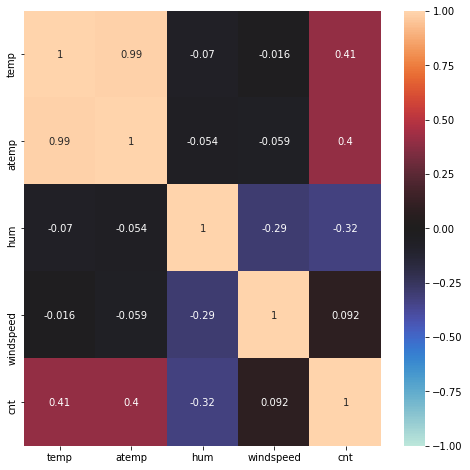

In [141]:
#realizando o plot da matriz de correlação das colunas  "season", "temp", "atemp", "hum", "windspeed"
plt.figure(figsize=(8, 8))
bikes_10 = bikes_5[["season", "temp", "atemp", "hum", "windspeed", "cnt"]]
matriz_de_correlação = bikes_10.corr()  #construindo a matriz de correlação
sns.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

**Pergunta 11**

In [0]:
#Contagem de valores Não Nulos da coluna 'temp'
qtd_not_NULL = bikes_5['temp'].count()
#Contagem de valores Nulos da coluna 'temp'
qtd_NULL = bikes_5['temp'].isnull().values.ravel().sum()
#Determinação da quantidade total de linhas
total_linhas = qtd_not_NULL + qtd_NULL

In [186]:
#Calculo da proporção de células Nulas em relação ao total de células
proporcao_NULL = qtd_NULL / total_linhas*100
print(proporcao_NULL)

10.069688638833835


**Pergunta 12**

In [187]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


**Pergunta 14**

In [192]:
#Pega o desvio padrão (std) somente para a coluna 'windspeed'
bikes_1.windspeed.std()

0.12230930508286268